<a href="https://www.kaggle.com/code/dhruv836/train?scriptVersionId=289214472" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [5]:
# Cloning  the repository and installing  dependencies
!git clone https://github.com/bmaltais/kohya_ss.git
%cd kohya_ss

!./setup.sh -n

Cloning into 'kohya_ss'...
remote: Enumerating objects: 15516, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 15516 (delta 2), reused 0 (delta 0), pack-reused 15512 (from 2)
Receiving objects: 100% (15516/15516), 23.88 MiB | 28.66 MiB/s, done.
Resolving deltas: 100% (10913/10913), done.
/kaggle/working/kohya_ss/kohya_ss
Skipping git operations.
Ubuntu detected.
Python TK found...
Switching to virtual Python environment using python3.11.
[12/30/25 09:16:03] INFO     Python version is 3.11.13 (main, ]8;id=223039;file:///kaggle/working/kohya_ss/kohya_ss/setup/setup_common.py\setup_common.py]8;;\:]8;id=161895;file:///kaggle/working/kohya_ss/kohya_ss/setup/setup_common.py#28\28]8;;\
                             Jun  4 2025, 08:57:29) [GCC                        
                             11.4.0]                                            
[12/30/25 09:16:05] INFO     Submodule initialized and        ]8;id=734610;fil

in GUI 

for fine tuning I set the following parameters to

Train batch size =1

Epoch = 10

Max train steps = 2000

LR Scheduler = cosine

Optimizer = AdamW8bit

Max grad norm = 8

Learninf Rate = 0.0001

LR warmup = 100

LR# cycles = 1

Text Encoder learning rate = 0.0005

Unet learning rate =0.0001

network rank = 16

network alpha = 16

Gredient accumulate steps =1

Save every N steps =100


Keep n tokens =1


Max token length = 75

gradient check pointing = true

shuffle caption = true

(for avoiding over fitting)

Min SNR Gamma = 5

Noise offset = 0.05

In [6]:
# Starting  the GUI (webpage for finetuning)
!python ./kohya_gui.py --share --headless

2025-12-30 09:24:37.999043: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-12-30 09:24:37.999540: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-12-30 09:24:38.001607: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
DEBUG:2025-12-30 09:24:43,528:jax._src.path:31: etils.epath found. Using etils.epath for file I/O.
09:24:53-678320 INFO     Kohya_ss GUI version: v25.2.1                          
                                                                                
09:24:53-750508 INFO     Submodule initialized and updated.                     
09:24:53-752042 INFO   

Found log file: /kaggle/working/kohya_ss/kohya_ss/logs/20251230093623/tensorboard/events.out.tfevents.1767087451.1e8f442c8f20.472.0
Available metrics: ['loss/current', 'loss/average', 'lr/textencoder', 'lr/unet', 'lr/group1', 'loss/epoch_average']


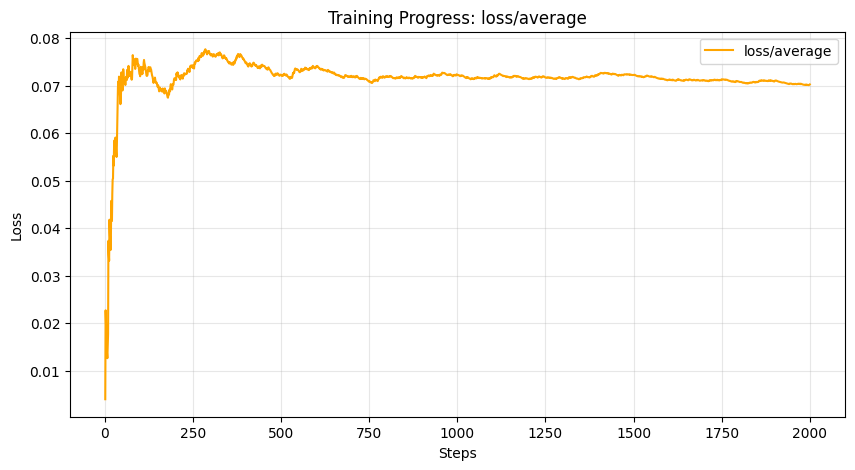

In [13]:
import os
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt

# 1. PATH SETUP
# Using the path you confirmed:
log_dir = "/kaggle/working/kohya_ss/kohya_ss/logs"

# Find the specific event file automatically
event_file = None
for root, dirs, files in os.walk(log_dir):
    for file in files:
        if "events.out.tfevents" in file:
            event_file = os.path.join(root, file)
            break

if event_file:
    print(f"Found log file: {event_file}")

    # 2. LOAD DATA
    ea = EventAccumulator(event_file)
    ea.Reload()

    # Check available tags
    tags = ea.Tags()['scalars']
    print("Available metrics:", tags)

    # 3. PLOT (FIXED SECTION)
    # Check for 'loss/average' or 'loss'
    target_tag = 'loss/average' if 'loss/average' in tags else 'loss'
    
    if target_tag in tags:
        # Get the list of events
        events = ea.Scalars(target_tag)
        
        # Extract steps and values explicitly (The Fix)
        steps = [e.step for e in events]
        values = [e.value for e in events]
        
        plt.figure(figsize=(10, 5))
        plt.plot(steps, values, label=target_tag, color='orange')
        plt.xlabel("Steps")
        plt.ylabel("Loss")
        plt.title(f"Training Progress: {target_tag}")
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()
    else:
        print(f"Could not find '{target_tag}' in metrics. Available: {tags}")

else:
    print("Could not find the event file. Please double check the path.")